In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from torchvision import models

In [6]:
# Load the state dictionary
resnet_state_dict = torch.load('Models/resnet_model.pth')

# Remove the 'resnet.' prefix from the keys
new_resnet_state_dict = {}
for k, v in resnet_state_dict.items():
    new_key = k.replace('resnet.', '')
    new_resnet_state_dict[new_key] = v

# Modify the fully connected layer to match the saved state dictionary
resnet_model = models.resnet18()
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = torch.nn.Linear(num_ftrs, 196608)  # Adjust the output size to match the saved model

# Load the modified state dictionary into the model
resnet_model.load_state_dict(new_resnet_state_dict)

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_33228/1363699920.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_state_dict = torch.load('Models/resnet

<All keys matched successfully>

In [10]:
# Load the state dictionary
gan_state_dict = torch.load('Models/gan_model.pth')

# Remove the 'generator.' prefix from the keys
new_gan_state_dict = {}
for k, v in gan_state_dict.items():
    if k.startswith('generator.'):
        new_key = k.replace('generator.', '')
        new_gan_state_dict[new_key] = v

# Modify the fully connected layer to match the saved state dictionary
gan_model = models.resnet18()
num_ftrs = gan_model.fc.in_features
gan_model.fc = torch.nn.Linear(num_ftrs, 196608)  # Adjust the output size to match the saved model

# Load the modified state dictionary into the model
gan_model.load_state_dict(new_gan_state_dict, strict=False)

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_33228/3694941743.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan_state_dict = torch.load('Models/gan_model

_IncompatibleKeys(missing_keys=['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.0.downsample.1.running_mean',

In [12]:
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
gan_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Text(0.5, 1.0, 'Noisy Image')

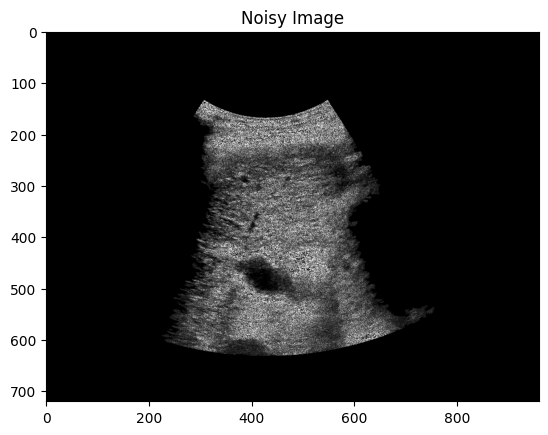

In [15]:
# Load the data
noisy_image_path = "Noisy Images/1-1_speckle_noise.png"
noisy_image = plt.imread(noisy_image_path)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")

In [22]:
# Print the initial shape of noisy_image
print("Initial shape of noisy_image:", noisy_image.shape)

# Remove unnecessary dimensions
noisy_image = np.squeeze(noisy_image)
print("Shape after squeezing:", noisy_image.shape)

# Assuming noisy_image is a 2D or 3D numpy array
if len(noisy_image.shape) == 2:
    # If noisy_image is 2D (height, width), add a channel dimension
    noisy_image = np.expand_dims(noisy_image, axis=-1)
    print("Added channel dimension:", noisy_image.shape)

# Ensure noisy_image has shape [height, width, channels]
assert len(noisy_image.shape) == 3, f"noisy_image should have 3 dimensions (height, width, channels), but got {noisy_image.shape}"

# If the image has 1 channel, convert it to 3 channels by duplicating the single channel
if noisy_image.shape[2] == 1:
    noisy_image = np.repeat(noisy_image, 3, axis=2)
    print("Converted to 3 channels:", noisy_image.shape)

# Expand dimensions to create a batch dimension and move channels to the second dimension
noisy_image = np.expand_dims(noisy_image, axis=0)  # Add batch dimension
print("Added batch dimension:", noisy_image.shape)

noisy_image = np.transpose(noisy_image, (0, 3, 1, 2))  # Change shape to [batch_size, channels, height, width]
print("Transposed shape:", noisy_image.shape)

# Convert to a torch tensor
noisy_image = torch.tensor(noisy_image).float()
print("Converted to tensor:", noisy_image.shape)

# Run the noisy image through the models
resnet_output = resnet_model(noisy_image)
gan_output = gan_model(noisy_image)

Initial shape of noisy_image: torch.Size([1, 1, 720, 960])
Shape after squeezing: torch.Size([720, 960])
Added channel dimension: (720, 960, 1)
Converted to 3 channels: (720, 960, 3)
Added batch dimension: (1, 720, 960, 3)
Transposed shape: (1, 3, 720, 960)
Converted to tensor: torch.Size([1, 3, 720, 960])


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming resnet_output and gan_output are already numpy arrays
# Reshape the outputs to [height, width]
height, width = 256, 256

# Reshape the outputs
resnet_output = resnet_output.reshape((height, width))
gan_output = gan_output.reshape((height, width))

# Display the output images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(resnet_output, cmap='gray')
plt.title("ResNet Output")
plt.subplot(1, 2, 2)
plt.imshow(gan_output, cmap='gray')
plt.title("GAN Output")
plt.show()

ValueError: cannot reshape array of size 196608 into shape (256,256)